# Set environment

In [1]:
### import libraries
# basic tools
import numpy as np
from   numpy import genfromtxt
import scipy.linalg as la
from   scipy.spatial.distance import cdist
import random

# Sklearn toolbox
from sklearn.decomposition import PCA
from sklearn.manifold      import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline      import Pipeline
from sklearn.datasets      import make_blobs

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

# --------------------------------------------------

### helper function
head = lambda x, n = 6: x[:n]
tail = lambda x, n = 6: x[-n:]

## Table of Contents <a name="table_contents"></a>

- [Question 1](#Q01)
- [Question 2](#Q02)
- [Question 3](#Q03)
- [Question 4](#Q04)

-----

# Question 1 <a name="Q01"></a>
[Back to the top](#table_contents)

**1**. 15 points

The MNIST data set needs to be downloaded from https://pjreddie.com/media/files/mnist_train.csv and https://pjreddie.com/media/files/mnist_test.csv and put in the data sub-directory first.

- Load the training and test MNIST digits data sets from `data/mnist_train.csv` and `data/mnist_test.csv`, and split into labels (column 0) and features (all other columns). 
- Each row is a vector of length 784 with values between 0 (black) and 255 (white) on the gray color scale. 
- Display the 3rd vector in the training set as a $28 \times 28$ image using `matplotlib`, using a helper function that plots an image and its corresponding label in the title given its row number, the feature matrix and the label vector.

## 1.0 Download the MNIST data set in the data sub-directory first

check if the data subfolder exist; if not, create one

In [2]:
%%bash
if ! [ -d ./data ]; then 
    mkdir data
fi

download [MNIST training dataset](https://pjreddie.com/media/files/mnist_train.csv)

In [3]:
!wget https://pjreddie.com/media/files/mnist_train.csv -O ./data/mnist_train.csv

--2018-10-03 19:50:59--  https://pjreddie.com/media/files/mnist_train.csv
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109575994 (104M) [application/octet-stream]
Saving to: ‘./data/mnist_train.csv’

./data/mnist_train. 100%[===================>] 104.50M  33.3MB/s    in 3.1s    

2018-10-03 19:51:02 (33.3 MB/s) - ‘./data/mnist_train.csv’ saved [109575994/109575994]



download [MNIST testing dataset](https://pjreddie.com/media/files/mnist_test.csv)

In [4]:
!wget https://pjreddie.com/media/files/mnist_test.csv -O ./data/mnist_test.csv

--2018-10-03 19:51:03--  https://pjreddie.com/media/files/mnist_test.csv
Resolving pjreddie.com (pjreddie.com)... 128.208.3.39
Connecting to pjreddie.com (pjreddie.com)|128.208.3.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18289443 (17M) [application/octet-stream]
Saving to: ‘./data/mnist_test.csv’

./data/mnist_test.c 100%[===================>]  17.44M  20.5MB/s    in 0.9s    

2018-10-03 19:51:05 (20.5 MB/s) - ‘./data/mnist_test.csv’ saved [18289443/18289443]



## 1.1 Load the training and test MNIST digits data sets from data/mnist_train.csv and data/mnist_test.csv, and split into labels (column 0) and features (all other columns).

First I need to [load the csv file into numpy array](https://stackoverflow.com/questions/3518778/how-do-i-read-csv-data-into-a-record-array-in-numpy)

In [5]:
mnist_train = genfromtxt('./data/mnist_train.csv', delimiter = ',')
mnist_test  = genfromtxt('./data/mnist_test.csv',  delimiter = ',')

**Observe and describe the data:**
- in training dataset, there are 60,000 data points
- in testing dataset, there are 10,000 data points
- each data point is a 785-length vector, where the first element (column 0) is the label, and the rest numbers in the vector is the features

In [6]:
mnist_train.shape

(60000, 785)

In [7]:
mnist_test.shape

(10000, 785)

In [8]:
head(mnist_train, 3)

array([[5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.]])

In [9]:
head(mnist_test, 3)

array([[7., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

**split into labels (column 0) and features (all other columns)**

In [10]:
### split the training set
mnist_train_label   = mnist_train[:, 0]
mnist_train_feature = mnist_train[:, 1:]

### split the testing set
mnist_test_label   = mnist_test[:, 0]
mnist_test_feature = mnist_test[:, 1:]

## 1.2 Display the 3rd vector in the training set as a  28×28  image using matplotlib, using a helper function that plots an image and its corresponding label in the title given its row number, the feature matrix and the label vector.

**Define a helper function** that plots an **image** and its corresponding **label** in the title **given its row number**

In [11]:
def plot_mnist(ax, feature, label, num_row):
    """ 
    a helper function that plots an image and its corresponding label in the title given its row number
    
    Parameters:
    - ax (plt.axes)
    - feature (2D np.array)
    - label (1D np.array)
    - num_row (int)
    
    Return:
    - None
    """
    img = feature[num_row].reshape(28, 28)
    lab = label[num_row]
    
    ax.imshow(img, cmap = plt.cm.gray)
    ax.set_title(int(lab))
    ax.set_xticks([])
    ax.set_yticks([])

check if the helper function works properly

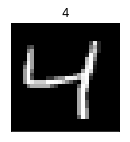

In [12]:
f, ax = plt.subplots(1, 1, figsize = (2, 2))
plot_mnist(ax, mnist_train_feature, mnist_train_label, 2)

-----

# Question 2 <a name="Q02"></a>
[Back to the top](#table_contents)

**2**. 20 points

- Use PCA to reduce the number of dimensions of the training data set so that it includes just above 90% of the total variance. Remember to scale the data before doing PCA.
- How many components are used?
- Reconstruct the training set from the dimension-reduced one. Do this without using the `inverse_transform` method (you can use this to check your solution)
- Show the image of the reconstructed data set for the vector in the third row.

## 2.1 Use PCA to reduce the number of dimensions of the <font color = "blue">training data</font> set so that it includes <font color = "blue">just above 90%</font> of the total variance. Remember to <font color = "blue">scale</font> the data before doing PCA

scale the data before donig PCA

In [13]:
scaler = StandardScaler()
mnist_train_feature_scaled = scaler.fit_transform(mnist_train_feature)

perform eigendecomposition of covariance matrix

In [14]:
### calculate covariance matrix
mat = mnist_train_feature_scaled

### eigendecomposition
eig_val, eig_vec = la.eig(mat.T @ mat)

### sort the eigen values in descending order 
idx = np.argsort(-eig_val)
eig_val, eig_vec = eig_val[idx], eig_vec[:, idx]

the eigenvalues represent the variance of new features, which are the principal components. We can calculate the percentage of explained variance each PC contribute by dividing each eigenvalue by the sum of all eigenvalues.

In [15]:
### calculate variance explained
vec1 = eig_val.real / np.sum(eig_val.real)
vec2 = np.cumsum(vec1)

### figure out by including how many PCs will the explained variance reached just above 90%
num_components = np.where(vec2 > 0.9)[0][0] + 1 # plus one b/c the index start at zero

visualize the results

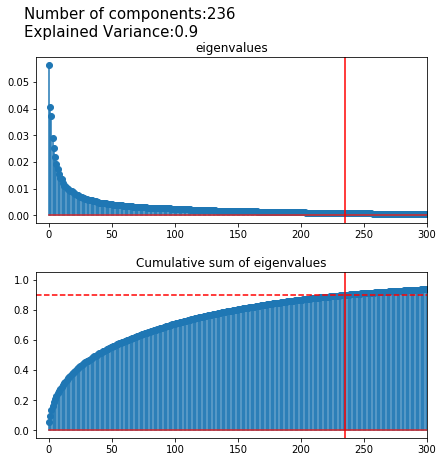

In [16]:
idx = num_components - 1

### set the figure and subplots
fig, axes = plt.subplots(2, 1, figsize = (7, 7))
fig.subplots_adjust(hspace = 0.3)
fig.suptitle("Number of components:" + str(num_components) + "\n" + 
             "Explained Variance:"   + str(round(vec2[idx], 1)), 
             fontsize = 15,
             x  = 0.1,
             ha = "left")

### first plot: the variance explained by each PCs
ax = axes[0]
ax.stem(vec1)
ax.set_title("eigenvalues")
ax.set_xlim((-10, 300))
ax.axvline(idx, color = "red")

### second plot: the variance explained by including more and more PCs
ax = axes[1]
ax.stem(vec2)
ax.set_title("Cumulative sum of eigenvalues")
ax.set_xlim((-10, 300))
ax.axvline(idx, color = "red")
ax.axhline(0.9, color = "red", linestyle = "--")

plt.show()

## 2.2 How many components are used?

The number of component

In [17]:
num_components

236

The explained variance

In [18]:
vec2[num_components - 1]

0.900043983487547

**Check the results using sklearn**

In [19]:
pipe = Pipeline(steps = [
    ("scalar", StandardScaler()),
    ("pca",    PCA(n_components = 0.9))
])

pipe = pipe.fit(mnist_train_feature)
pca  = pipe.named_steps["pca"]

In [20]:
pca.n_components_

236

In [21]:
pca.explained_variance_ratio_.sum()

0.9000439834875468

## 2.3 Reconstruct the training set from the dimension-reduced one. Do this without using the inverse_transform method (you can use this to check your solution)

In [22]:
### scale training set
scaler = StandardScaler()
mat = scaler.fit_transform(mnist_train_feature)

### eigendecomposition of covariance matrix
eig_val, eig_vec = la.eig(mat.T @ mat)

### sort the eigen values in descending order 
idx = np.argsort(-eig_val)
eig_val, eig_vec = eig_val[idx], eig_vec[:, idx]

### calcualte explained variance
vec1 = eig_val.real / np.sum(eig_val.real)
vec2 = np.cumsum(vec1)

### get the number of components to reach 90%
num_components = np.where(vec2 > 0.9)[0][0] + 1
vec = eig_vec[:, 0:num_components].reshape(-1, num_components)

### reconstruct the training set from the dimension-reduced one
mat_reduc01 = mat @ vec
mat_recon01 = vec @ vec.T @ mat.T
mat_recon01 = mat_recon01.T

**Check using PCA in sklearn**

In [23]:
### scale training set
scaler = StandardScaler()
mat = scaler.fit_transform(mnist_train_feature)

### perform PCA in sklearn
pca = PCA(n_components = 0.9)
mat_reduc02 = pipe.fit_transform(mat)
mat_recon02 = pipe.inverse_transform(mat_reduc02)

Both results are the same, showing that I did reconstruct the data correctly from the reduced one

In [24]:
np.allclose(mat_recon01, mat_recon02)

True

## 2.4 Show the image of the reconstructed data set for the vector in the third row.
**Note: it should become a blur image now b/c some info is loss**

rescale the reconstruct data back (since it is standardize previously)

In [25]:
scaler    = StandardScaler()
scaler    = scaler.fit(mnist_train_feature)
mat_recon = scaler.inverse_transform(mat_recon01)

original

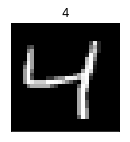

In [26]:
fig, ax = plt.subplots(1, 1, figsize = (2, 2))
plot_mnist(ax, mnist_train_feature, mnist_train_label, 2)

reconstructued

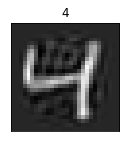

In [27]:
fig, ax = plt.subplots(1, 1, figsize = (2, 2))
plot_mnist(ax, mat_recon, mnist_train_label, 2)

-----

# Question 3 <a name="Q03"></a>
[Back to the top](#table_contents)

**3**. 15 points
 
- Using the test dataset, first use PCA to reduce the dimensionality from 784 to 50. Remember to scale the data before doing PCA.
- Now use TSNE to further reduce the 50 dimensional data set to 2. 
- Plot a scatter plot of the data, coloring each point by its label. 
- Create a legend for the plot showing what color points go with what label

(Note: The TSNE transform will take a few minutes - go have coffee.)

## 3.1 Use the <font color = "blue">test dataset</font>, and do the following
- **scale the data before doing PCA**
- **use PCA to reduce the dimensionality from 784 to 50** 
- **use TSNE to further reduce the 50 dimensional data set to 2**

set the pipeline: scale $\rightarrow$ PCA $\rightarrow$ TSNE

In [30]:
pipe = Pipeline(steps = [
    ("scalar", StandardScaler()),
    ("pca",    PCA(n_components = 50, random_state = 0)),
    ("tsne",   TSNE(n_components = 2, random_state = 0))
])

run the pipeline

In [31]:
dat_scaled_pca50_tsne2_seed0 = pipe.fit_transform(mnist_test_feature)

since running the tsne step took a long time, I decided to save the results

In [33]:
np.save("./data/mnist_test_scaled_pca50_tsne2_seed0.npy", dat_scaled_pca50_tsne2_seed0)

## 3.2 Plot a scatter plot of the data
- **coloring each point by its label**
- **Create a legend for the plot showing what color points go with what label**

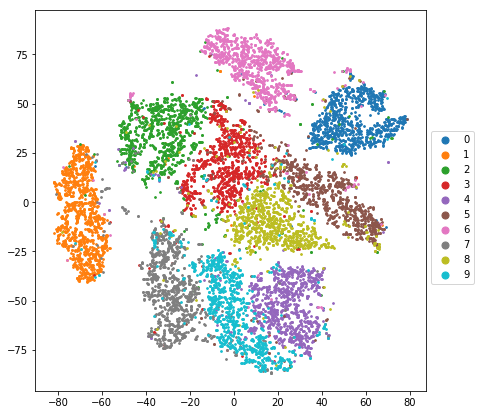

In [34]:
### set a plot
fig, ax = plt.subplots(1, 1, figsize = (7, 7))

### plot points from label 0 to label 9
dat = dat_scaled_pca50_tsne2_seed0
for num in range(10):
    idx = (mnist_test_label.astype(np.int) == num)
    ax.scatter(
        x = dat[idx, 0], 
        y = dat[idx, 1], 
        label = num,
        s = 3.0)

### set legend of labels
for lh in fig.legend(loc = 7, fontsize = 10).legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [50]

-----

# Question 4 <a name="Q04"></a>
[Back to the top](#table_contents)

**4**. 50 points

- Implement the k-means++ algorithm from the description given at https://en.wikipedia.org/wiki/K-means%2B%2B (summarized below)
- Use k-means++ to initialize a k-means clustering of the TsNE 2-dimensional data, using your own code (i.e. do not use `scikit-learn` or similar libraries for this)
- Align the true labels and the k-means labels and show the two TSNE plots side-by-side with coloring of points by label values

K-means++ algorithm to initialize centers

- Choose one center uniformly at random from among the data points.
- For each data point x, compute D(x), the distance between x and the nearest center that has already been chosen.
- Choose one new data point at random as a new center, using a weighted probability distribution where a point x is chosen with probability proportional to D(x)2.
- Repeat Steps 2 and 3 until k centers have been chosen.
- Now that the initial centers have been chosen, proceed using standard k-means clustering.

### 4.0 load the tsne plot

In [85]:
mnist_test_scaled_pca50_tsne2_seed0 = np.load("./data/mnist_test_scaled_pca50_tsne2_seed0.npy")
X = mnist_test_scaled_pca50_tsne2_seed0

Set plotting style to dark background for better visualization

In [86]:
plt.style.use('dark_background')

### 4.1 implement k-means++ algorithm

In [87]:
def kmeanpp(X, k, random_state = 0):
    """K-means++ algorithm to initialize centers"""
    ### initialization
    random.seed(random_state)
    nrow, ncol = X.shape
    centers = X[np.random.choice(nrow, size = 1)]
    
    while (centers.shape[0] < k) and (centers.shape[0] < nrow):
        
        ### calculate the pairwise distance of points and current centers
        mat = cdist(X, centers)
        
        ### for each point, select distance of the point and its nearest center
        idx = np.argmin(mat, axis = 1)
        
        ### convert the distance^2 into probability vector
        prob = mat[np.arange(nrow), idx]**2
        prob = prob / sum(prob)
        
        ### select a point as a new cluster based on the probability vector
        new_center = X[np.random.choice(nrow, size = 1, p = prob)]
        centers    = np.vstack([centers, new_center])
    
    return centers

**Check if the kmeanpp works properly:**   
Below I plot the initial centers got from kmeanpp, as you can see, the centers tend to be far from each other. Note that the color of centers represent the order of centers acquired from the function.

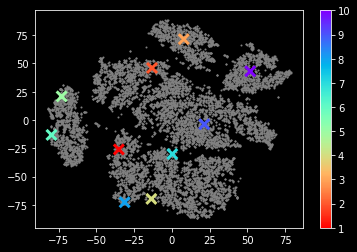

In [88]:
### test the function
centers = kmeanpp(X, 10, random_state = 0)

### plot points
plt.scatter(X[:, 0], X[:, 1], s = 1, color = "grey")

### plot centers got from kmeanpp
num_center = centers.shape[0]
plt.scatter(centers[:, 0], centers[:, 1],
            marker = "x",
            linewidth = 3,
            c    = np.arange(num_center, 0, -1),
            s    = 100,
            cmap = plt.cm.rainbow_r)
plt.colorbar()

### 4.2 Use k-means++ to initialize a k-means clustering of the TsNE 2-dimensional data, using your own code

**implement kmean functions**

In [89]:
def my_kmeans(X, k, tol = 1e-6, random_state = 0):
    """K-means with tolerance"""
    ### intialization
    nrow, ncol = X.shape
    delta      = np.infty
    centers    = kmeanpp(X, k, random_state = random_state)
    
    while delta > tol:
        ### calculate the pairwise distance of points and current centers
        mat = cdist(X, centers)
        
        ### for each point, select distance of the point and its nearest center
        idx = np.argmin(mat, axis = 1)
        
        ### update centers
        new_centers = np.array([
            np.mean(X[idx == i], axis = 0) 
            for i in range(k)
        ])
        
        ### calculate changes of center
        delta = np.sum((new_centers - centers)**2)
        centers = new_centers
        
    return (idx, centers)

run kmeans using kmean++ to initialize the centers

In [90]:
z, centers_km = my_kmeans(X, 10)

calculate the centers using **true labels**

In [91]:
centers_true = np.array([
    np.mean(X[mnist_test_label == i], axis = 0) 
    for i in range(10)
])

**Show and compare the tsne plots between true labels and labels determined by kmeans**

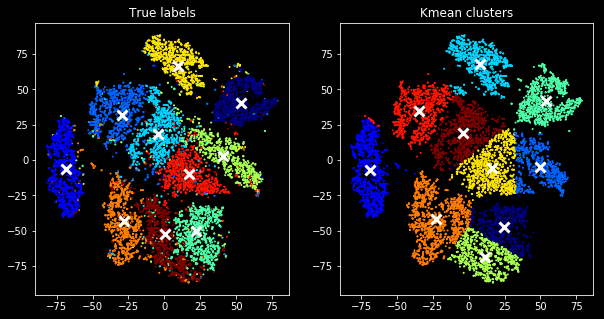

In [92]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))

### true labels
ax = axes[0]

# plot data points
ax.scatter(X[:, 0], X[:, 1], 
           s    = 1, 
           c    = mnist_test_label,
           cmap = plt.cm.get_cmap('jet', 10))

# plot centers
ax.scatter(centers_true[:, 0], centers_true[:, 1], 
           marker    = 'x', 
           linewidth = 3, 
           s = 100, 
           c = 'white')

ax.set_title("True labels")

### results of kmeans
ax = axes[1]

# plot data points
ax.scatter(X[:, 0], X[:, 1], 
           s    = 1, 
           c    = z,
           cmap = plt.cm.get_cmap('jet', 10))

# plot centers
ax.scatter(centers_km[:, 0], centers_km[:, 1], 
           marker    = 'x', 
           linewidth = 3, 
           s = 100, 
           c = 'white')

ax.set_title("Kmean clusters")
pass

### 4.3 Align the true labels and the k-means labels and show the two TSNE plots side-by-side with coloring of points by label values

**implement my own Hungarian algorithm for balance assigning problem**

In [93]:
def my_hungarian_balance(mat, tol = 1e-6):
    """Perform hungarian algorithm for balance assignment problem
    >>> mat = np.array([
        [ 9, 11, 14, 11,  7],
        [ 6, 15, 13, 13, 10],
        [12, 13,  6,  8,  8],
        [11,  9, 10, 12,  9],
        [ 7, 12, 14, 10, 14]])
    >>> idx_row, idx_col = my_hungarian_balance(mat)
    
    >>> print(idx_row)
    [0 1 2 3 4]
    
    >>> print(idx_col)
    [4 0 2 1 3]
    
    >>> mat[idx_row, idx_col]
    array([ 7,  6, 10,  9,  6])
    """
    
    ### helper functions
    def count_zero(arr, tol = tol):
        """use a tolerance to determine zero and count the number of zero element"""
        return np.sum(arr <= tol) 
    
    def is_zero(arr, tol = tol):
        """use a tolerance to determine whether if each element is zero or not"""
        return arr <= tol
    
    ##### initialization
    mat        = mat.copy() # store original matrix; avoid mutate input matrix
    nrow, ncol = mat.shape # dimension
    
    # the function is not able to deal with the unbalance assignment yet
    assert nrow == ncol, "the input matrix is not balance"
    
    
    ##### For each row/col of the matrix, find the smallest element and 
    ##### subtract it from every element in its row/col.
    # operation on row
    mat = mat - mat.min(axis = 1).reshape(-1, 1)
    
    # operation on column
    mat = mat - mat.min(axis = 0).reshape(1, -1)
    
    ##### get the row & col index of elements that generate the minimum sum
    idx_zero = [] # declare it for while loop
    while len(idx_zero) < nrow:
        
        ###########################
        # Cover all zeros in the matrix using minimum number of 
        # horizontal and vertical lines.
        
        # initialization
        vline = np.array([True] * nrow) 
        hline = np.array([True] * ncol)
        idx_zero = []
        
        # check each row and draw vertical lines
        for row in range(nrow):
            
            # set index and get value of the row vector
            idx = np.arange(nrow)
            val = mat[row, :]
            
            # draw vertical line (index in vline) if only one zero
            if count_zero(val[vline]) == 1:
                idx_remain = idx[vline]
                val_remain = val[vline]

                # draw line
                idx_zero_col = idx_remain[is_zero(val_remain)]
                idx_zero_col = idx_zero_col[0] # convert one-element int array to int
                vline[idx_zero_col] = False 

                # record where the only zero element is
                idx_zero.append((row, idx_zero_col))
        
        # check each column and draw horizontal lines
        for col in range(ncol):
            
            # skip if meet the vertical line
            if vline[col] == False:
                continue

            # set index and get value of the column vector
            idx = np.arange(ncol)
            val = mat[:, col]

            # draw horizontal line (index in hline) if only one zero
            if count_zero(val[hline]) == 1:
                idx_remain = idx[hline]
                val_remain = val[hline]
                
                # draw line
                idx_zero_row = idx_remain[is_zero(val_remain)]
                idx_zero_row = idx_zero_row[0] # convert one-element int array to int
                hline[idx_zero_row] = False

                # record where the only zero element is
                idx_zero.append((idx_zero_row, col))      
        
        #############################
        # Test for Optimality
        
        # break the loop if already got the solution
        if (len(idx_zero) >= nrow):
            break
            
        # create matrix mask using the lines
        is_remain = vline.reshape(1, -1) * hline.reshape(-1, 1)
        is_inter  = np.logical_not(vline.reshape(1, -1)) * np.logical_not(hline.reshape(-1, 1))
        
        # update the matrix
        x = np.min(mat[is_remain])
        mat[is_remain] -= x
        mat[is_inter]  += x
    
    ### arrange the result row & col indices of the selected elements
    ### list of tuple -> np array of row and col
    idx_zero_row = np.array([x[0] for x in idx_zero])
    idx_zero_col = np.array([x[1] for x in idx_zero])
    
    # sort the coordinate pairs by row index
    idx = np.argsort(idx_zero_row)
    return (idx_zero_row[idx], idx_zero_col[idx])

get the pairwise distance between centers of true label and centers of kmeans

In [94]:
mat = cdist(centers_true, centers_km)

perform cluster assignment based on the distance matrix

In [95]:
idx_row, idx_col = my_hungarian_balance(mat)
print(idx_row) 
print(idx_col) 

[0 1 2 3 4 5 6 7 8 9]
[4 1 8 9 0 2 3 7 6 5]


**Check my_hungarian_balance function with the linear_sum_assignment in scipy**

In [96]:
from scipy.optimize import linear_sum_assignment
idx_row, idx_col = linear_sum_assignment(mat)
print(idx_row) 
print(idx_col) 

[0 1 2 3 4 5 6 7 8 9]
[4 1 8 9 0 2 3 7 6 5]


**Plot the results**   
After alignment, now the color are actually matched between the true clusters and kmean clusters.

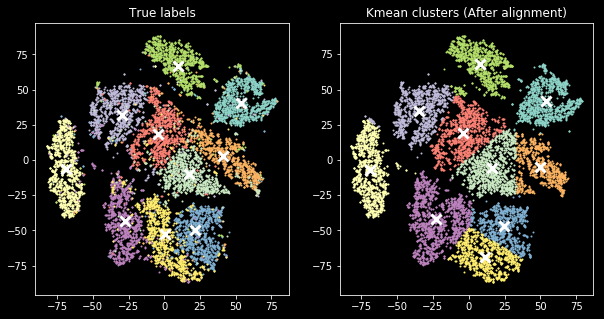

In [98]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))

### True lables
ax = axes[0]

# plot data points
for num in range(10):
    idx = (mnist_test_label == num) # <---------- True Labels
    ax.scatter(X[idx, 0], X[idx, 1], 
               s     = 1, 
               label = num,
               cmap  = plt.cm.get_cmap('jet', 10))

# plot centers
ax.scatter(centers_true[:, 0], centers_true[:, 1], 
            marker    = 'x', 
            linewidth = 3, 
            s = 100, 
            c = 'white')

ax.set_title("True labels")

### results of kmeans
ax = axes[1]

# plot data points
for num in range(10):
    idx = (z == idx_col[num]) # <------ order kmean centers based on the alignment
    ax.scatter(X[idx, 0], X[idx, 1], 
               s     = 1, 
               label = num,
               cmap  = plt.cm.get_cmap('jet', 10))

# plot centers
ax.scatter(centers_km[:, 0], centers_km[:, 1], 
            marker    = 'x', 
            linewidth = 3, 
            s = 100, 
            c = 'white')

ax.set_title("Kmean clusters (After alignment)")
pass